In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
stations = pd.read_csv('../../data/three_near_stations_with_stats.csv')

In [3]:
X_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']
y_columns = ['line_cd']

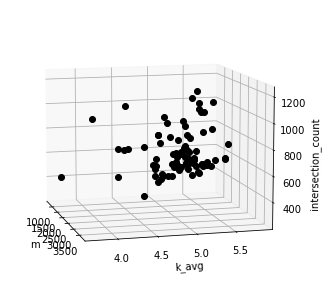

主成分分析前のデータ次元：(83, 18)
主成分分析後のデータ次元：(83, 2)


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

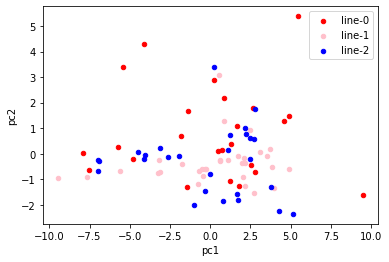

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データ分割
X = stations[X_columns]
y = stations[y_columns]
X_train = X
y_train = y
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#三次元のグラフ
fig = plt.figure()
ax_3d = Axes3D(fig)
ax_3d.set_xlabel(X_columns[1])
ax_3d.set_ylabel(X_columns[2])
ax_3d.set_zlabel(X_columns[3])
ax_3d.view_init(elev=10., azim=-15)
ax_3d.plot(X[X_columns[1]],X[X_columns[2]],X[X_columns[3]],marker="o",linestyle='None',color='black')
plt.show()

#標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

#主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('主成分分析前のデータ次元：{}'.format(X.shape))
print('主成分分析後のデータ次元：{}'.format(X_pca.shape))

#グラフ化
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1]), pd.DataFrame(y)], axis=1)
merge_data.columns = ['pc1','pc2', 'line_cd']

#データを分ける
line_0 = merge_data[y.line_cd==11312]
line_1 = merge_data[y.line_cd==24001]
line_2 = merge_data[y.line_cd==25001]


#プロット
ax = line_0.plot.scatter(x='pc1', y='pc2',color='red', label='line-0')
line_1.plot.scatter(x='pc1', y='pc2',color='pink', label='line-1', ax=ax)
line_2.plot.scatter(x='pc1', y='pc2',color='blue', label='line-2', ax=ax)

In [5]:
merge_data.to_csv('../../data/three_near_line_pca.csv')

In [6]:
# 寄与率
print(pca.explained_variance_ratio_)

[0.73402457 0.1110971 ]


In [7]:
# 基底ベクトルの値
pca.components_

array([[-0.26979987, -0.26763263,  0.02480832, -0.27220644, -0.01401647,
        -0.25183127,  0.25711652, -0.26479292,  0.25889944, -0.27223049,
        -0.26854936, -0.27076716, -0.24442352, -0.25888977,  0.13202505,
         0.099407  , -0.26609003, -0.2637695 ],
       [-0.0562304 , -0.13430305, -0.37453214,  0.03447136,  0.60172653,
        -0.20951618,  0.00506802,  0.10214499,  0.03538294,  0.03532433,
        -0.06148446,  0.03844196, -0.25080657,  0.11912651, -0.52057991,
        -0.25436707, -0.01073538, -0.01525951]])

In [8]:
len(X_columns)

18

In [9]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
pc = merge_data[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    46
1    16
2    21
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

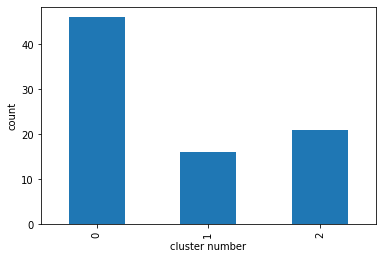

In [10]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=3, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number', index=stations.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [11]:
# 駅のデータにクラスター番号のデータを結合
stations_with_cluster = pd.concat([stations, pd.Series(labels, index=stations.index)], axis=1)

# 先頭の5行を表示
stations_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,cluster_number
0,1131201,1130101,東京,NaN,NaN,11312,13,100-0005,東京都千代田区丸の内一丁目,139.766103,...,680,189.211808,186.109975,26330.970417,22499.049783,1.014035,0.001250,239,105.905438,1
1,1131202,1130223,神田,NaN,NaN,11312,13,101-0044,東京都千代田区鍛冶町二丁目13-1,139.770641,...,1574,403.986454,398.583343,43598.513632,35685.441016,1.010215,0.000514,511,212.383825,1
2,1131203,1131203,御茶ノ水,NaN,NaN,11312,13,101-0062,千代田区神田駿河台２丁目,139.764955,...,1745,441.539940,430.401996,44360.780311,32394.428182,1.008452,0.000000,543,215.996565,1
3,1131207,1131102,四ツ谷,NaN,NaN,11312,13,160-0004,東京都新宿区四谷一丁目,139.730644,...,671,202.694435,170.001784,28946.199668,18123.142752,1.041690,0.000000,257,105.025141,1
4,1131211,1130208,新宿,NaN,NaN,11312,13,160-0022,東京都新宿区新宿三丁目38-1,139.700464,...,1093,295.499671,281.955936,36087.051021,24851.686072,1.022940,0.000000,396,162.524819,1


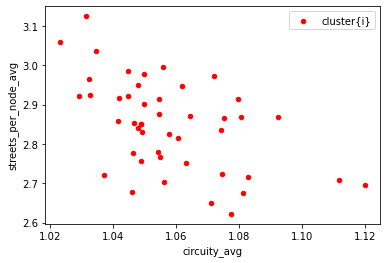

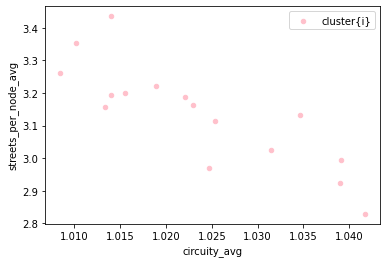

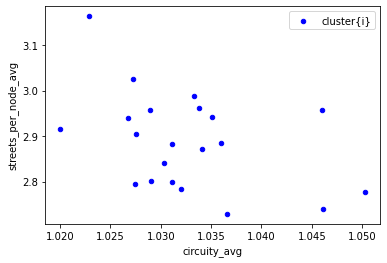

In [12]:
stations_0 = stations_with_cluster[stations_with_cluster['cluster_number'] == 0]
stations_1 = stations_with_cluster[stations_with_cluster['cluster_number'] == 1]
stations_2 = stations_with_cluster[stations_with_cluster['cluster_number'] == 2]
# クラスタリング結果のグラフ化
ax = None
colors = ['red', 'pink', 'blue']
for i, station in stations_with_cluster.groupby('cluster_number'):
#    station.plot.scatter(x='k_avg', y='streets_per_node_avg', color=colors[i], label='cluster{i}', ax=ax)
    station.plot.scatter(x='circuity_avg', y='streets_per_node_avg', color=colors[i], label='cluster{i}', ax=ax)

In [13]:
# クラスタ番号と路線を軸に集計し、路線を列に設定
cross_cluster_line_cd = stations_with_cluster.groupby(['cluster_number', 'line_cd']).size().unstack().fillna(0)
cross_cluster_line_cd

line_cd,11312,24001,25001
cluster_number,,,
0,9,22,15
1,10,3,3
2,5,7,9


In [14]:
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 0)])
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 1)])
print([station['station_name'] for _, station in stations_with_cluster.iterrows() if (station['cluster_number'] == 2)])

['武蔵境', '東小金井', '武蔵小金井', '国分寺', '西国分寺', '日野', '豊田', '西八王子', '高尾', '八幡山', '千歳烏山', '仙川', 'つつじヶ丘', '柴崎', '国領', '布田', '調布', '西調布', '飛田給', '武蔵野台', '多磨霊園', '東府中', '分倍河原', '中河原', '聖蹟桜ヶ丘', '百草園', '高幡不動', '南平', '平山城址公園', '長沼', '北野', '代々木八幡', '成城学園前', '喜多見', '狛江', '和泉多摩川', '登戸', '向ヶ丘遊園', '生田', '読売ランド前', '百合ヶ丘', '新百合ヶ丘', '柿生', '鶴川', '玉川学園前', '町田']
['東京', '神田', '御茶ノ水', '四ツ谷', '新宿', '西荻窪', '吉祥寺', '三鷹', '国立', '立川', '新宿', '府中', '京王八王子', '新宿', '南新宿', '参宮橋']
['中野', '高円寺', '阿佐ケ谷', '荻窪', '八王子', '笹塚', '代田橋', '明大前', '下高井戸', '桜上水', '上北沢', '芦花公園', '代々木上原', '東北沢', '下北沢', '世田谷代田', '梅ヶ丘', '豪徳寺', '経堂', '千歳船橋', '祖師ヶ谷大蔵']


In [20]:
import folium
center_lat, center_lon = (35.651820534474,139.54461236426)

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in stations_with_cluster.iterrows():
    color = 'red' if station['cluster_number'] == 0 else 'pink' if station['cluster_number'] == 1 else 'blue'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

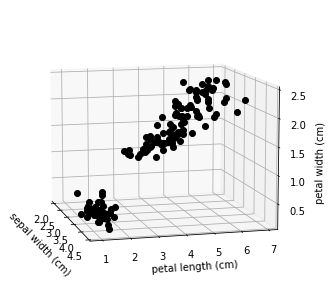

主成分分析前のデータ次元：(150, 4)
主成分分析後のデータ次元：(150, 2)


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

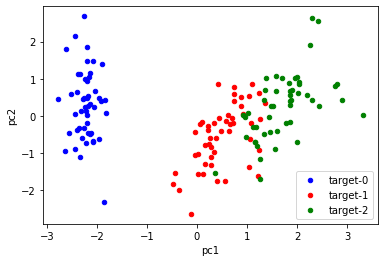

In [15]:
#AI-TECHGYM-1-6-A-2
#教師なし学習 PCA

#データ加工・処理・分析ライブラリ
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#インポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#アヤメのデータを読み込むためのインポート
from sklearn.datasets import load_iris

#サンプルデータ
iris = load_iris()

#三次元のグラフ
fig = plt.figure()
ax_3d = Axes3D(fig)
ax_3d.set_xlabel(iris.feature_names[1])
ax_3d.set_ylabel(iris.feature_names[2])
ax_3d.set_zlabel(iris.feature_names[3])
ax_3d.view_init(elev=10., azim=-15)
ax_3d.plot(iris.data[:,1],iris.data[:,2],iris.data[:,3],marker="o",linestyle='None',color='black')
plt.show()

#標準化
sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

#主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('主成分分析前のデータ次元：{}'.format(iris.data.shape))
print('主成分分析後のデータ次元：{}'.format(X_pca.shape))

#グラフ化
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1]), pd.DataFrame(iris.target)], axis=1)
merge_data.columns = ['pc1','pc2', 'target']

#データを分ける
iris_0 = merge_data[iris.target==0]
iris_1 = merge_data[iris.target==1]
iris_2 = merge_data[iris.target==2]

#プロット
ax = iris_0.plot.scatter(x='pc1', y='pc2',color='blue', label='target-0')
iris_1.plot.scatter(x='pc1', y='pc2',color='red', label='target-1', ax=ax)
iris_2.plot.scatter(x='pc1', y='pc2',color='green', label='target-2', ax=ax)